<a href="https://colab.research.google.com/github/SanketMN/Assignments/blob/main/EDA2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 75.2 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=8d2e4a3ead1706d97ca0ab74ff4be9f39d5fc2c6469b27564817910a2f10bfcf
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.19 requires pandas>=2, but you have pandas 1.5.3 which is incompatible

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
from sklearn.ensemble import IsolationForest


In [ ]:
df = pd.read_csv('adult_with_headers.csv')

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## The dataset consists of various columns 14 independent features giving information about people and a target column income ##
## the independent columns give information about their socioeconomic status which may or may not affect their income##

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


## There are no null values ##

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df['workclass'].nunique()

9

In [ ]:
df['education'].nunique()

16

In [ ]:
df['marital_status'].nunique()

7

In [ ]:
df['occupation'].nunique()

15

In [ ]:
df['relationship'].nunique()

6

In [ ]:
df['race'].nunique()

5

In [ ]:
df['sex'].nunique()

2

In [ ]:
df['native_country'].nunique()

42

In [ ]:
df['income'].nunique()

2

In [ ]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## sex column has only two unique values therfore we can apply one hot encoding to this column ##

In [ ]:
df = pd.get_dummies(data=df,columns= ['sex'], dtype=int)

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0,1


## All the other categorical columns have more than 5 unique values therefore we can apply Label encoding to these columns ##

In [ ]:
# Columns to label encode
columns_to_encode = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country','income']

# Apply LabelEncoder to the specified columns
le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,Female,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,Male,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,Female,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,Male,0,0,20,39,0


In [ ]:
income_col = df.pop('income')
df['income'] = income_col
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,Female,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,Male,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,Female,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,Male,0,0,20,39,0


In [ ]:
df.dtypes

,0
age,int64
workclass,int64
fnlwgt,int64
education,int64
education_num,int64
marital_status,int64
occupation,int64
relationship,int64
race,int64
capital_gain,int64


## one hot encoding creates as many new columns as the number of unique values in a categorical column ##
## however label encoding does not create new columns but assigns unique numerical values to each row in a categorical column ##
## if the number of columns increases after a certain number, it affects the performance of the model. "CURSE OF DIMENSIONALITY"##

In [ ]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,1077.648844,87.303830,40.437456,36.718866,0.330795,0.669205,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,7385.292085,402.960219,12.347429,7.823782,0.470506,0.470506,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,0.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,0.000000,0.000000,40.000000,39.000000,0.000000,1.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,45.000000,39.000000,1.000000,1.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000,1.000000,1.000000


In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

<Axes: >

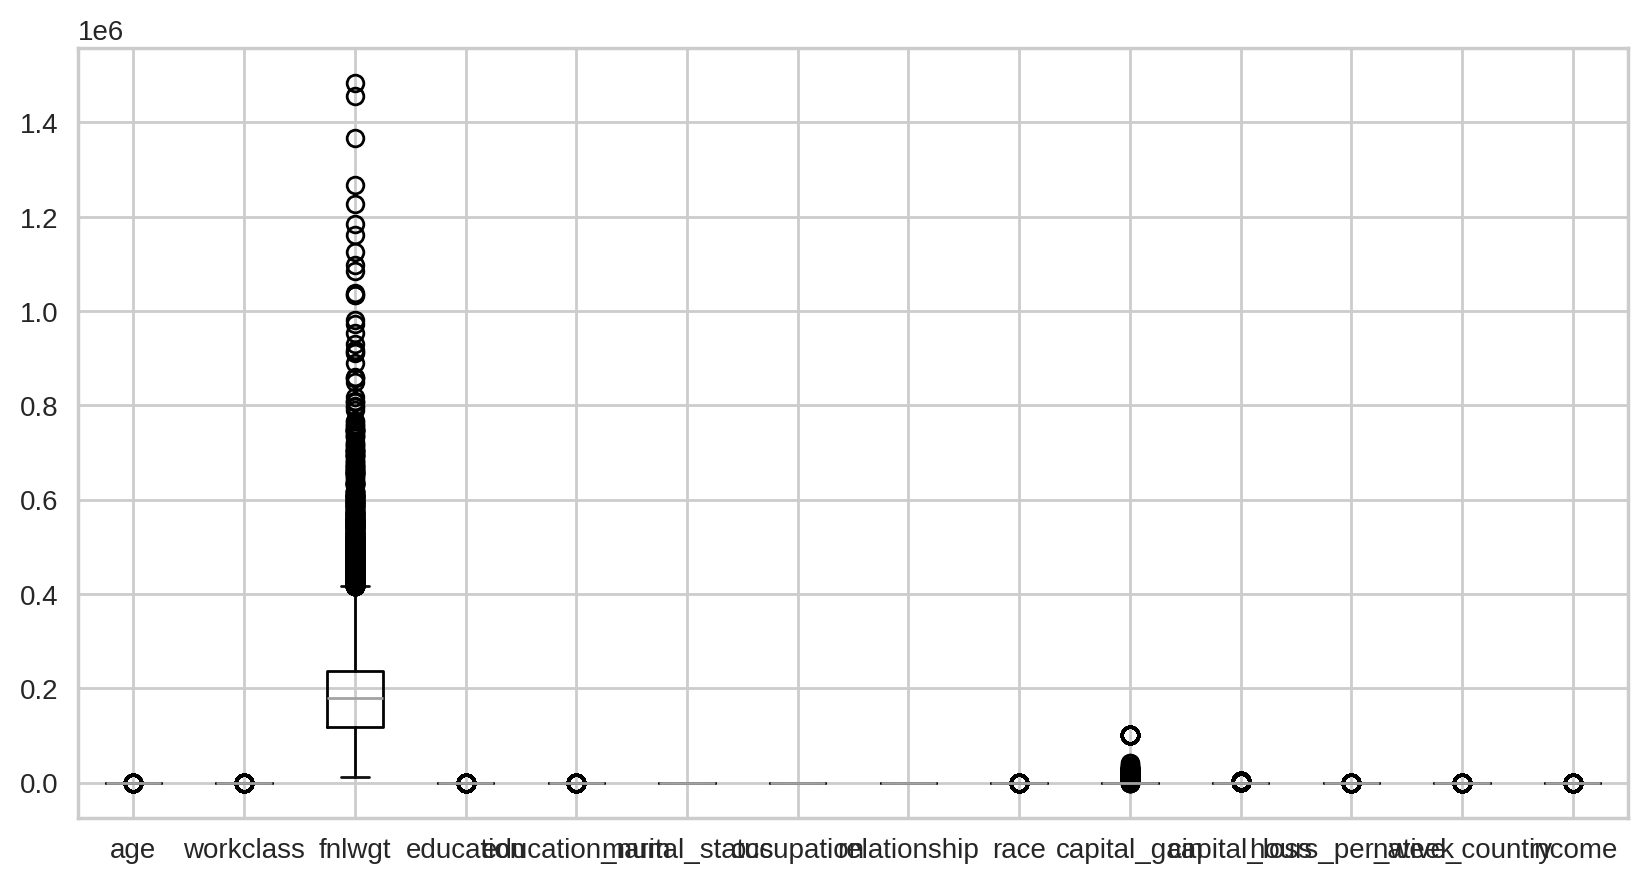

In [ ]:
df.boxplot()

In [ ]:
correlation = df['education_num'].corr(df['income'].apply(lambda x: 1 if x == '>50K' else 0))

In [ ]:
print(f"The correlation between education_num and income is: {correlation}")

The correlation between education_num and income is: nan


In [ ]:
x = df.iloc[:,:-1]
y = df['income']

In [ ]:
mn = MinMaxScaler()

In [ ]:
x = mn.fit_transform(x)
x

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.95121951, 0.        ,
        1.        ],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.95121951, 0.        ,
        1.        ],
       [0.28767123, 0.5       , 0.13811345, ..., 0.95121951, 0.        ,
        1.        ],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.95121951, 1.        ,
        0.        ],
       [0.06849315, 0.5       , 0.12849934, ..., 0.95121951, 0.        ,
        1.        ],
       [0.47945205, 0.625     , 0.18720338, ..., 0.95121951, 1.        ,
        0.        ]])

In [ ]:
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)
x

array([[ 0.03067056,  2.15057856, -1.06361075, ...,  0.29156857,
        -0.70307135,  0.70307135],
       [ 0.83710898,  1.46373585, -1.008707  , ...,  0.29156857,
        -0.70307135,  0.70307135],
       [-0.04264203,  0.09005041,  0.2450785 , ...,  0.29156857,
        -0.70307135,  0.70307135],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ...,  0.29156857,
         1.42233076, -1.42233076],
       [-1.21564337,  0.09005041,  0.11095988, ...,  0.29156857,
        -0.70307135,  0.70307135],
       [ 0.98373415,  0.77689313,  0.92989258, ...,  0.29156857,
         1.42233076, -1.42233076]])

## Feature Engineering ##

In [ ]:
x = df.iloc[:,:-1]
y = df['income']

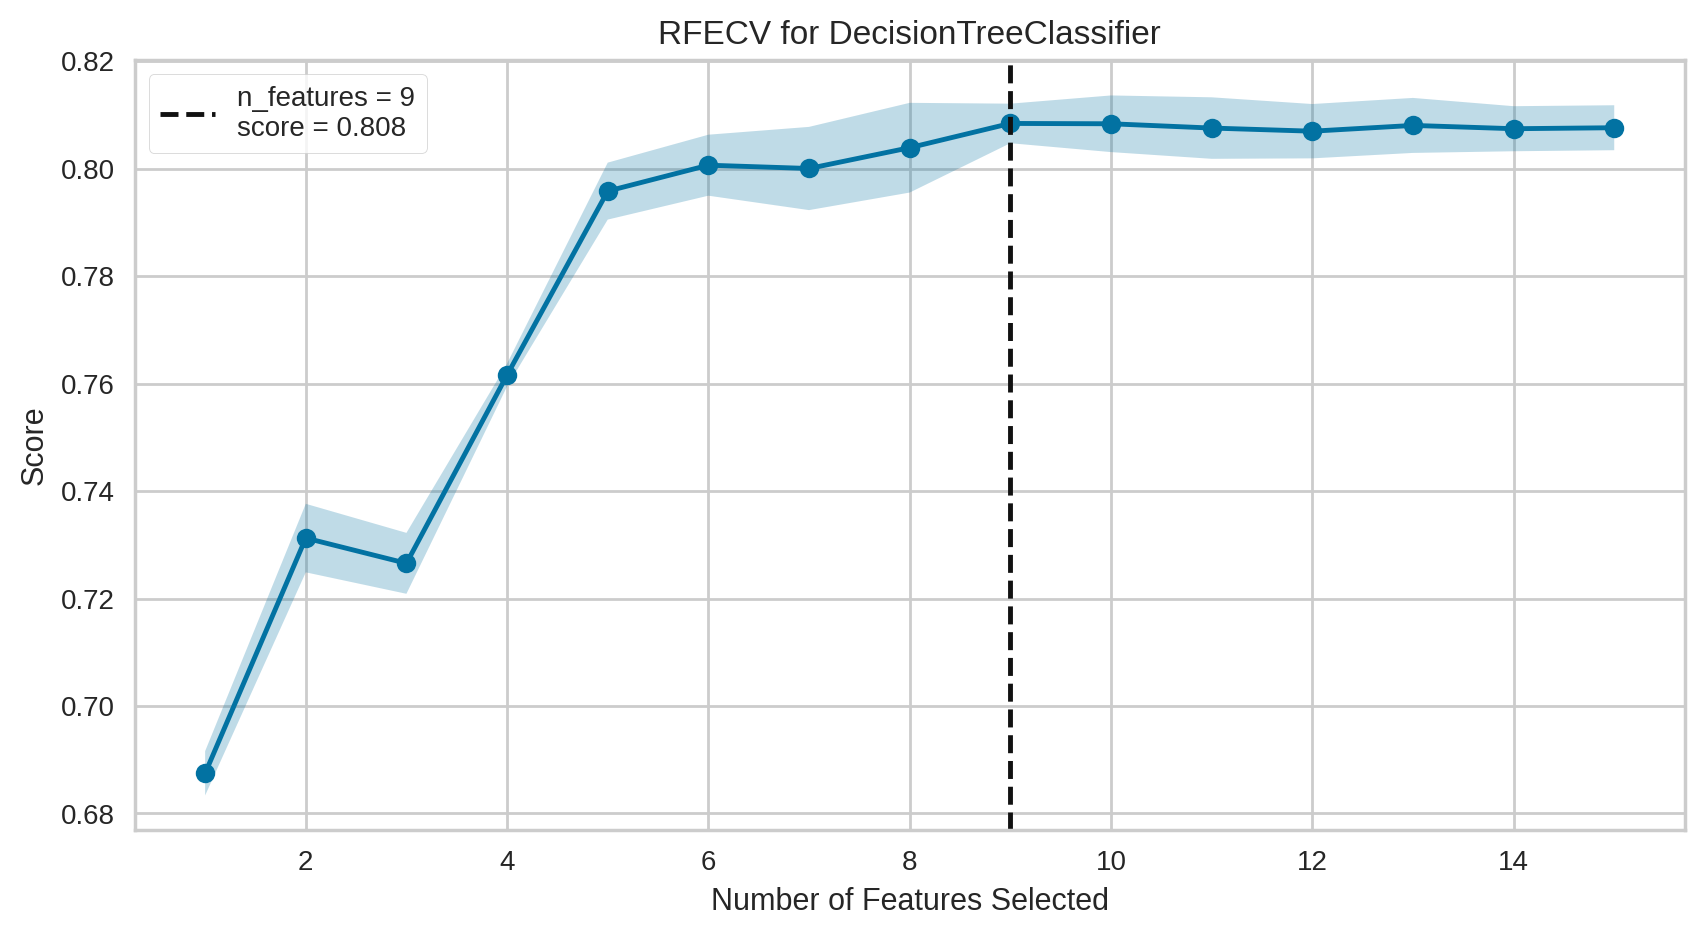

In [ ]:
rfe = rfecv(DecisionTreeClassifier(),x,y)

In [ ]:
rfe.ranking_

array([1, 1, 1, 4, 1, 5, 1, 1, 3, 1, 1, 1, 2, 7, 6])

In [ ]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Female',
       'sex_ Male'],
      dtype='object')

In [ ]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [ ]:
rfe_Sel

,Ranking,Features
0,1,age
1,1,workclass
2,1,fnlwgt
3,4,education
4,1,education_num
5,5,marital_status
6,1,occupation
7,1,relationship
8,3,race
9,1,capital_gain


In [ ]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
0,1,age
1,1,workclass
2,1,fnlwgt
4,1,education_num
6,1,occupation
7,1,relationship
9,1,capital_gain
10,1,capital_loss
11,1,hours_per_week


## As per above exercise of feature selection through RFECV we can select any two features which have ranking 1 ##
## In my opinion education and occupation are the two most important features. ##
## Education is the base of a persons career growth and earnings and being in the right occupation is also very important. ##
## in my opinion native_country where one lives is the next important feature. ##

## Identifying skewness and applying transformation ##

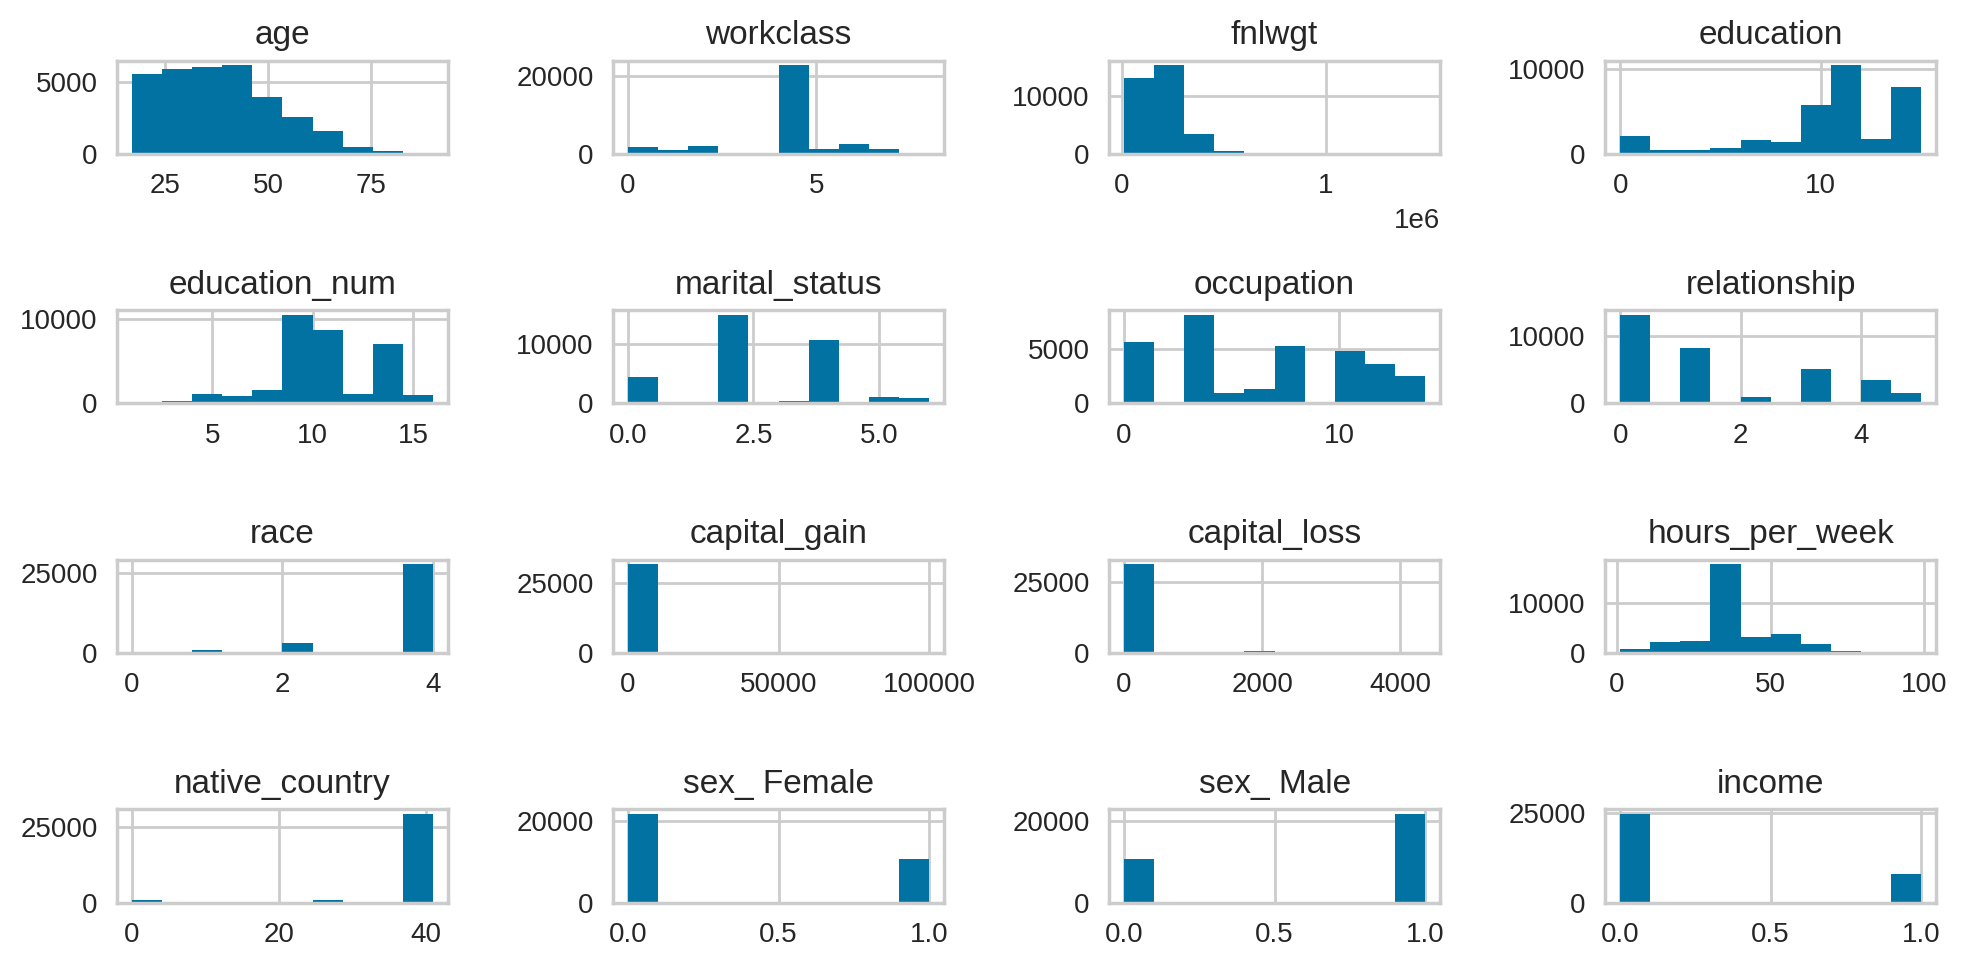

In [ ]:
df.hist()
plt.tight_layout()

## We can see that there is negative skewness in the feature education ##

In [ ]:
feature = 'education'

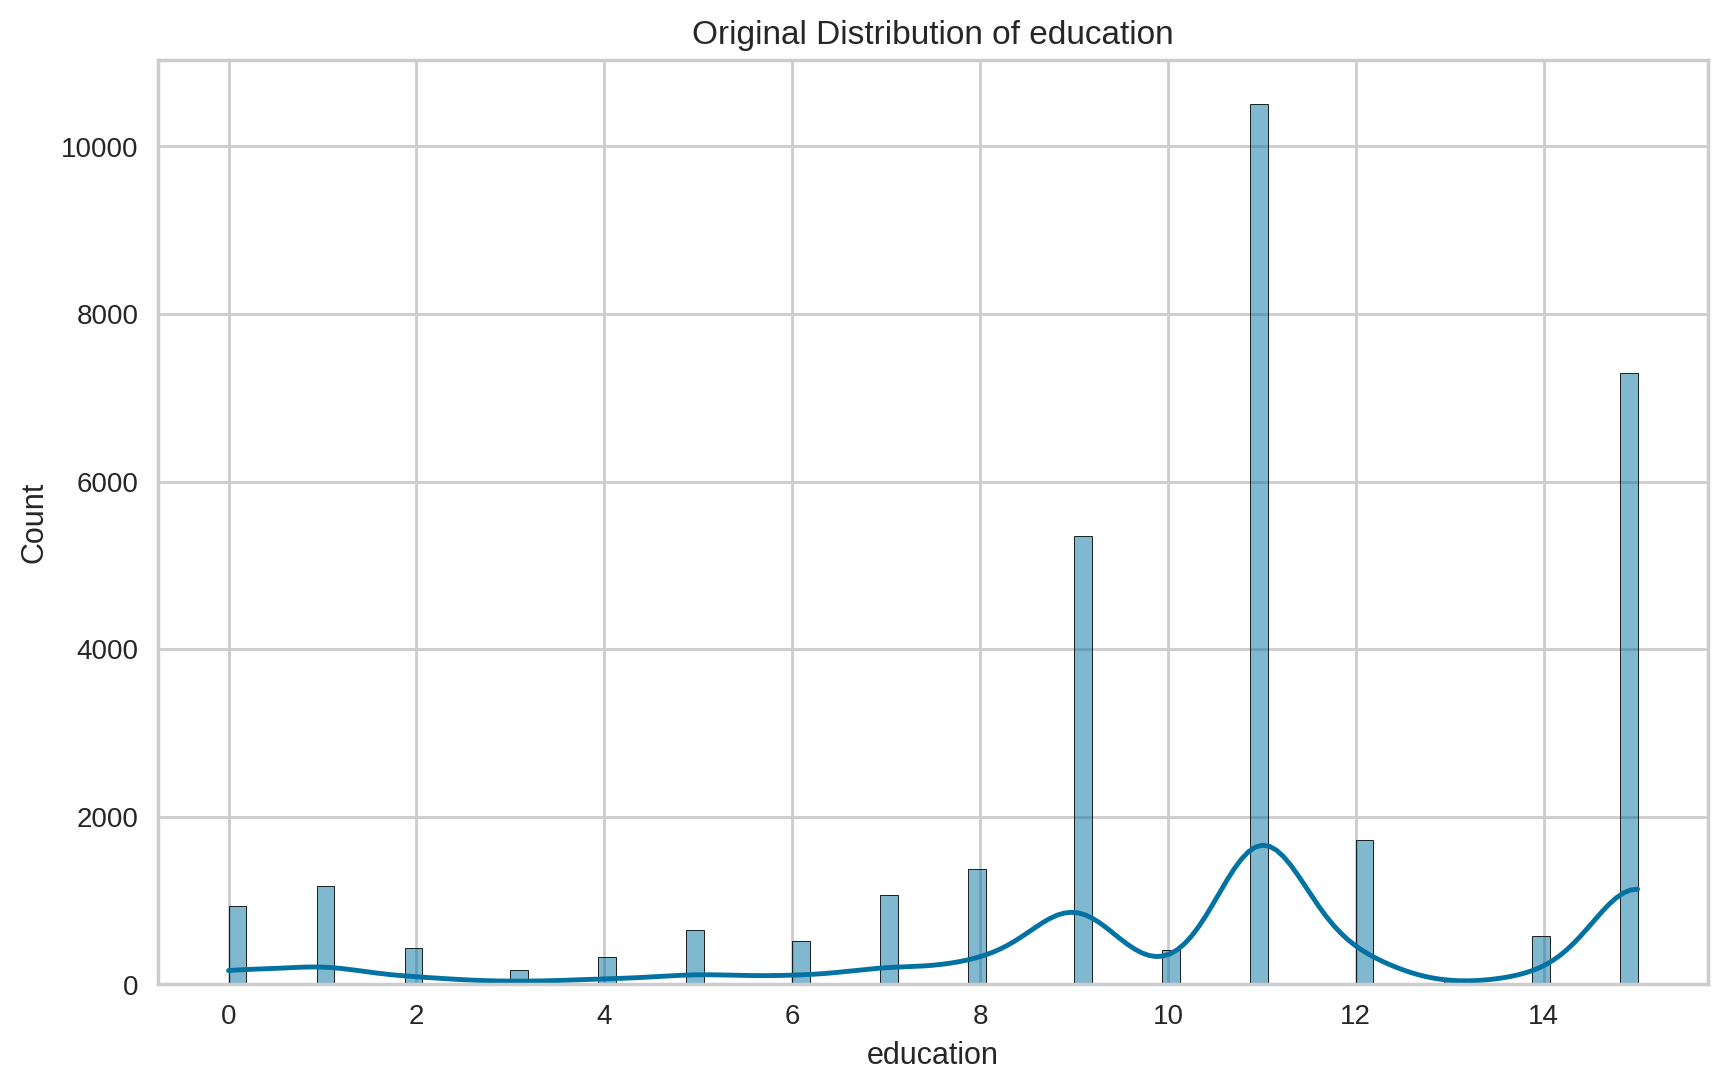

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True)
plt.title('Original Distribution of education')
plt.show()

# Apply log transformation ##

In [ ]:
df[feature + '_log'] = np.log1p(df[feature])

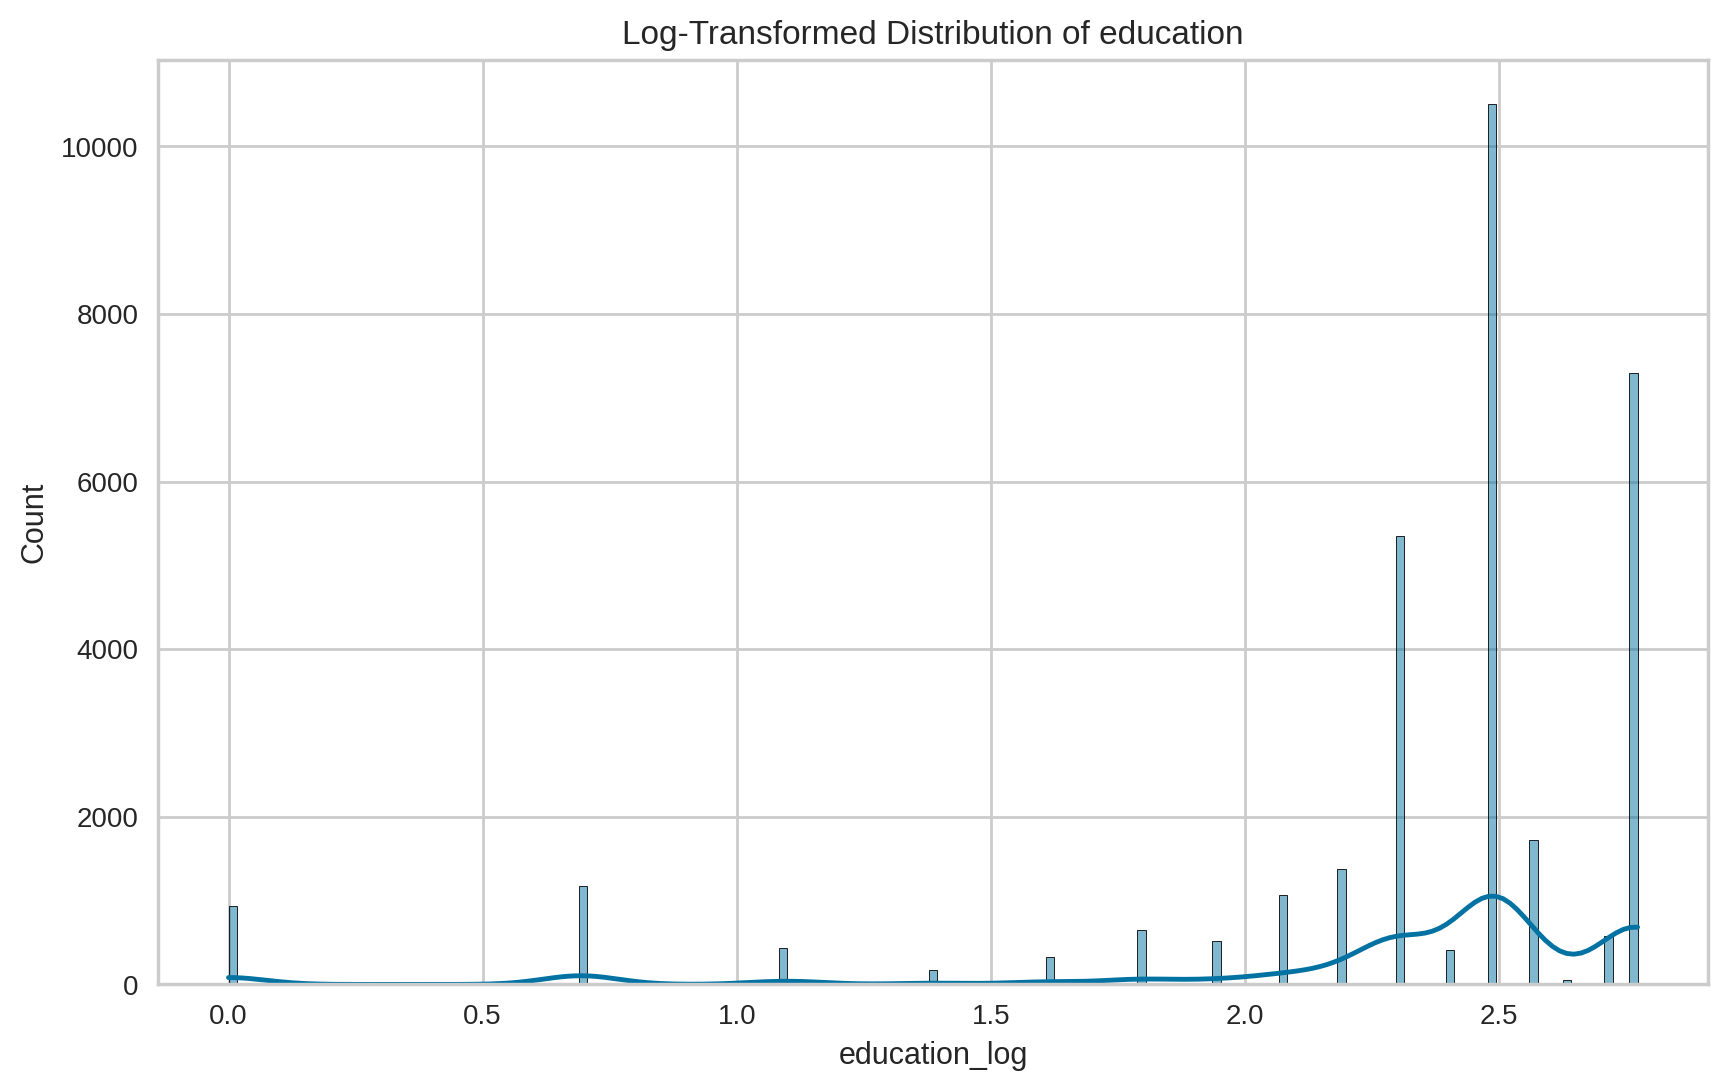

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature + '_log'], kde=True)
plt.title('Log-Transformed Distribution of education')
plt.show()

In [ ]:
print(f"Skewness of original {feature}: {df[feature].skew()}")
print(f"Skewness of log-transformed {feature}: {df[feature + '_log'].skew()}")

Skewness of original education: -0.9340424374279611
Skewness of log-transformed education: -2.4852725816473296


## Feature Selection ##

In [ ]:
iso = IsolationForest()

iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
df['Outliers'] = ypred
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income,education_log,Outliers
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,0,2.302585,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,0,2.302585,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,0,2.484907,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,0,0.693147,1
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,0,2.302585,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,0,2.079442,1
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,1,2.484907,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,0,2.484907,1
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,0,2.484907,1


## In the Outliers column where the value is -1 are the actual outliers. ##

In [ ]:
Outliers = df[df['Outliers'] == -1]

In [ ]:
Outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income,education_log,Outliers
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,0,2.302585,-1
6,49,4,160187,6,5,3,8,1,2,0,0,16,23,1,0,0,1.945910,-1
8,31,4,45781,12,14,4,10,1,4,14084,0,50,39,1,0,1,2.564949,-1
11,30,7,141297,9,13,2,10,0,1,0,0,40,19,0,1,1,2.302585,-1
14,40,4,121772,8,11,2,3,0,1,0,0,40,0,0,1,1,2.197225,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,4,139180,9,13,0,10,4,2,15020,0,45,39,1,0,1,2.302585,-1
32539,71,0,287372,10,16,2,0,0,4,0,0,10,39,0,1,1,2.397895,-1
32545,39,2,111499,7,12,2,1,5,4,0,0,20,39,1,0,1,2.079442,-1
32551,32,4,34066,0,6,2,6,0,0,0,0,40,39,0,1,0,0.000000,-1


In [ ]:
print(f"Number of outliers: {len(Outliers)}")

Number of outliers: 5075


In [ ]:
df_cleaned = df[df['Outliers'] == 1]

In [ ]:
df_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income,education_log,Outliers
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,0,2.302585,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,0,2.302585,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,0,2.484907,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,0,0.693147,1
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,1,0,0,2.564949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,15,10,4,11,1,4,0,0,40,39,0,1,0,2.772589,1
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,0,2.079442,1
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,1,2.484907,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,0,2.484907,1


## The above data is free from outliers as we have selected only the rows where the outlier value is 1 ##

## Effect of outliers on model performance ##
## Reduced Accuracy: Outliers can reduce the overall accuracy of the model. ##
## The model might struggle to accurately predict both the outliers and the regular observations. ##
## Overfitting: Models may overfit to the outliers, capturing noise instead of the underlying pattern. ##
## This can result in a model that performs well on the training data but poorly on new, unseen data. ##

## PPS ##

In [ ]:
import ppscore as ps

In [ ]:
df = pd.read_csv('adult_with_headers.csv')

In [ ]:
ps.score(df, x='education_num',y = 'income')

{'x': 'education_num',
 'y': 'income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.2424,
 'model_score': 0.3147061088344019,
 'model': DecisionTreeRegressor()}

In [ ]:
feature_sel = ps.matrix(df)

In [ ]:
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
220,income,capital_gain,0.000000,regression,True,mean absolute error,1093.884000,1760.682115,DecisionTreeRegressor()
221,income,capital_loss,0.000000,regression,True,mean absolute error,94.942600,176.261353,DecisionTreeRegressor()
222,income,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,8.097596,DecisionTreeRegressor()
223,income,native_country,0.000000,classification,True,weighted F1,0.841082,0.841082,DecisionTreeClassifier()


In [ ]:
feature_sel[feature_sel['y'] == 'income']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
14,age,income,0.005415,classification,True,weighted F1,0.653115,0.654994,DecisionTreeClassifier()
29,workclass,income,0.094056,classification,True,weighted F1,0.653115,0.685742,DecisionTreeClassifier()
44,fnlwgt,income,0.000000,classification,True,weighted F1,0.653115,0.644900,DecisionTreeClassifier()
59,education,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
74,education_num,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
89,marital_status,income,0.000000,classification,True,weighted F1,0.653115,0.653017,DecisionTreeClassifier()
104,occupation,income,0.092410,classification,True,weighted F1,0.653115,0.685171,DecisionTreeClassifier()
119,relationship,income,0.000000,classification,True,weighted F1,0.653115,0.653115,DecisionTreeClassifier()
134,race,income,0.000000,classification,True,weighted F1,0.653115,0.653115,DecisionTreeClassifier()
149,sex,income,0.000000,classification,True,weighted F1,0.653115,0.653115,DecisionTreeClassifier()


## As per predictive power score none of the features have a strong correlation with the target column income as the ppscores are not close to 1. The features education, education_num,capital_gain,capital_loss have slightly higher ppscore than other features. As per correlation matrix there is no correlation between education and income.##